In [1]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.neighbors import NearestCentroid

In [2]:
data1 = pd.read_csv('villes.csv', sep=";")
data1

,ville,janv,fev,mars,avril,mai,juin,juil,aout,sept,oct,nov,dec
0,ajac,7.7,8.7,10.5,12.6,15.9,19.8,22.0,22.2,20.3,16.3,11.8,8.7
1,ange,4.2,4.9,7.9,10.4,13.6,17.0,18.7,18.4,16.1,11.7,7.6,4.9
2,ango,4.6,5.4,8.9,11.3,14.5,17.2,19.5,19.4,16.9,12.5,8.1,5.3
3,besa,1.1,2.2,6.4,9.7,13.6,16.9,18.7,18.3,15.5,10.4,5.7,2.0
4,biar,7.6,8.0,10.8,12.0,14.7,17.8,19.7,19.9,18.5,14.8,10.9,8.2
5,bord,5.6,6.6,10.3,12.8,15.8,19.3,20.9,21.0,18.6,13.8,9.1,6.2
6,bres,6.1,5.8,7.8,9.2,11.6,14.4,15.6,16.0,14.7,12.0,9.0,7.0
7,cler,2.6,3.7,7.5,10.3,13.8,17.3,19.4,19.1,16.2,11.2,6.6,3.6
8,dijo,1.3,2.6,6.9,10.4,14.3,17.7,19.6,19.0,15.9,10.5,5.7,2.1
9,embr,0.5,1.6,5.7,9.0,13.0,16.4,18.9,18.3,15.3,10.1,4.6,0.5


In [3]:
#slice data
X = data1.iloc[:,1:13]
labels = data1.iloc[:, 0]

In [4]:
# Standardizing the data
X = StandardScaler().fit_transform(X)

In [5]:
pca1 = PCA(n_components=2)
X_pca = pca1.fit_transform(X)

In [6]:
pca1.explained_variance_ratio_*100

array([87.26819349, 11.7206018 ])

# Exercice 1 KMeans

In [7]:
kmeans = KMeans(n_clusters=3, init ='k-means++', max_iter = 150, random_state = 5).fit(X_pca)
clustering = kmeans.labels_

In [8]:
kmeans.cluster_centers_

array([[-2.786318  , -0.38257503],
       [ 4.69981613, -0.05315433],
       [-0.60762112,  0.54518644]])

In [9]:
clustering

array([1, 2, 2, 0, 1, 1, 2, 2, 0, 0, 0, 0, 0, 2, 1, 1, 0, 2, 1, 1, 0, 2,
       1, 0, 2, 0, 0, 0, 1, 2, 2, 0])

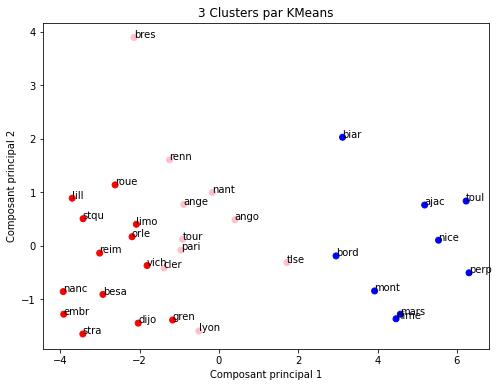

In [10]:
colors = ['red','yellow','blue','pink']
plt.figure(figsize=(8,6))
plt.title('3 Clusters par KMeans')
plt.xlabel('Composant principal 1')
plt.ylabel('Composant principal 2')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c= clustering, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
 plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

# Exercice 2 AgglomerativeClustering

In [11]:
labels.values

array(['ajac', 'ange', 'ango', 'besa', 'biar', 'bord', 'bres', 'cler',
       'dijo', 'embr', 'gren', 'lill', 'limo', 'lyon', 'mars', 'mont',
       'nanc', 'nant', 'nice', 'nime', 'orle', 'pari', 'perp', 'reim',
       'renn', 'roue', 'stqu', 'stra', 'toul', 'tlse', 'tour', 'vich'],
      dtype=object)

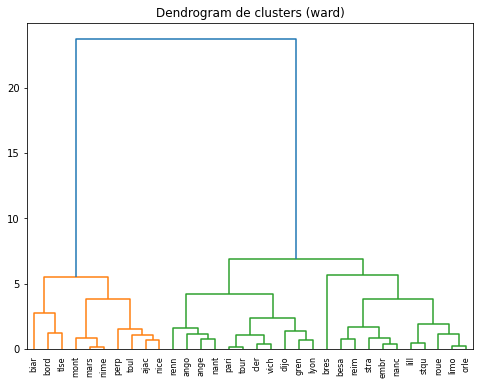

In [12]:
#linkage ward
plt.figure(figsize =(8, 6))
plt.title('Dendrogram de clusters (ward)')
#Dendrogram = shc.dendrogram((shc.linkage(X_pca, method ='ward')))
Z = linkage(X_pca,'ward')
dendrogram(Z, leaf_rotation=90, leaf_font_size=8, labels=labels.values)
plt.show()

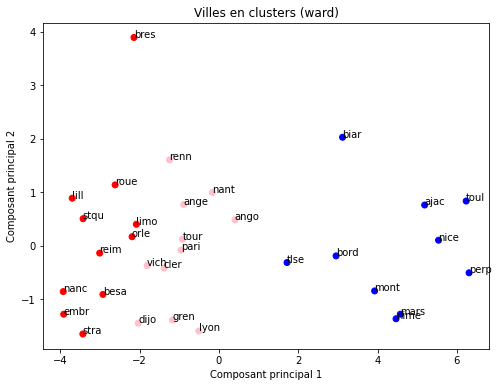

In [13]:
ac3 = AgglomerativeClustering(n_clusters = 3,affinity='euclidean', linkage='ward')
plt.figure(figsize =(8, 6))
plt.title('Villes en clusters (ward)')
plt.xlabel('Composant principal 1')
plt.ylabel('Composant principal 2')
plt.scatter(X_pca[:, 0], X_pca[:, 1],  
           c = ac3.fit_predict(X_pca), cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
 plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

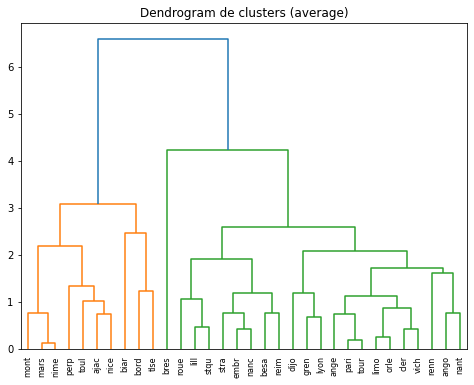

In [14]:
#linkage average
plt.figure(figsize =(8, 6))
plt.title('Dendrogram de clusters (average)')
#Dendrogram = shc.dendrogram((shc.linkage(X_pca, method ='average')))
Z = linkage(X_pca,'average')
dendrogram(Z, leaf_rotation=90, leaf_font_size=8, labels=labels.values)
plt.show()

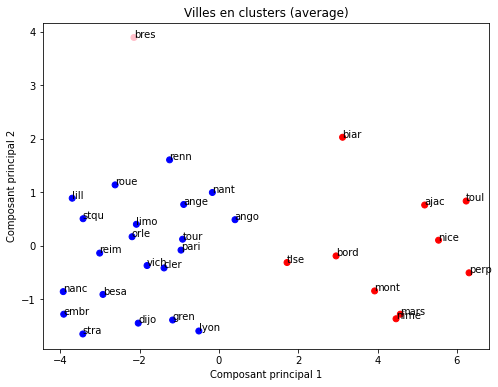

In [15]:
ac3 = AgglomerativeClustering(n_clusters = 3,affinity='euclidean', linkage='average')
plt.figure(figsize =(8, 6))
plt.title('Villes en clusters (average)')
plt.xlabel('Composant principal 1')
plt.ylabel('Composant principal 2')
plt.scatter(X_pca[:, 0], X_pca[:, 1],  
           c = ac3.fit_predict(X_pca), cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
 plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

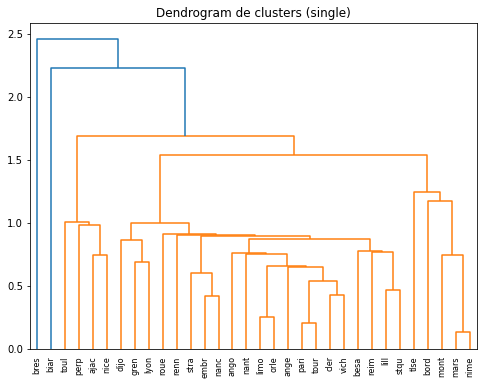

In [16]:
#méthode ward
plt.figure(figsize =(8, 6))
plt.title('Dendrogram de clusters (single)')
#Dendrogram = shc.dendrogram((shc.linkage(X_pca, method ='single')))
Z = linkage(X_pca,'single')
dendrogram(Z, leaf_rotation=90, leaf_font_size=8, labels=labels.values)
plt.show()

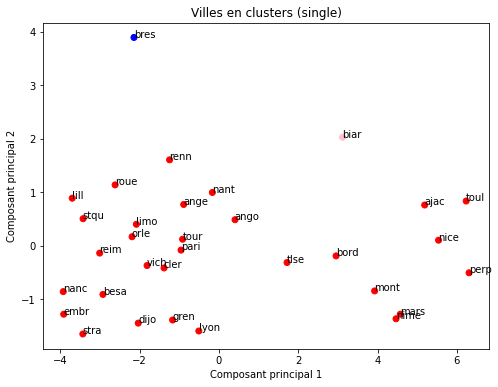

In [17]:
ac3 = AgglomerativeClustering(n_clusters = 3,affinity='euclidean', linkage='single')
plt.figure(figsize =(8, 6))
plt.title('Villes en clusters (single)')
plt.xlabel('Composant principal 1')
plt.ylabel('Composant principal 2')
plt.scatter(X_pca[:, 0], X_pca[:, 1],  
           c = ac3.fit_predict(X_pca), cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
 plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

# Exercic 3 Silhouette index -KMeans

In [18]:
#KMeans
k = [2, 3, 4, 5, 6]  
# Ajouter la silhouette scores de  différent models de list
silhouette_scoresKM = []
kmeans2 = KMeans(n_clusters=2, init = 'k-means++', max_iter = 5, random_state = 5)
# Fit le KMeans model
kmeans2.fit_predict(X_pca)
clustering2 = kmeans2.labels_
# Calcul le silhoutte score k=2
silhouette_scoresKM.append(silhouette_score(X_pca,clustering2, metric='euclidean'))

In [19]:
# Calcul le silhoutte score k=3
kmeans3 = KMeans(n_clusters=3, init = 'k-means++', max_iter = 5, random_state = 5)
kmeans3.fit_predict(X_pca)
clustering3 = kmeans3.labels_        
silhouette_scoresKM.append(silhouette_score(X_pca,clustering3, metric='euclidean'))

In [20]:
# Calcul le silhoutte score k=4
kmeans4 = KMeans(n_clusters=4, init = 'k-means++', max_iter = 5, random_state = 5)
kmeans4.fit_predict(X_pca)
clustering4 = kmeans4.labels_        
silhouette_scoresKM.append(silhouette_score(X_pca,clustering4, metric='euclidean'))     

In [21]:
# Calcul le silhoutte score k=5
kmeans5 = KMeans(n_clusters=5, init = 'k-means++', max_iter = 5, random_state = 5)   
kmeans5.fit_predict(X_pca)
clustering5 = kmeans5.labels_     
silhouette_scoresKM.append(silhouette_score(X_pca,clustering5, metric='euclidean'))   

In [22]:
# Calcul le silhoutte score k=6
kmeans6 = KMeans(n_clusters=6, init = 'k-means++', max_iter = 5, random_state = 5)   
kmeans6.fit_predict(X_pca)
clustering6 = kmeans6.labels_     
silhouette_scoresKM.append(silhouette_score(X_pca,clustering6, metric='euclidean'))   

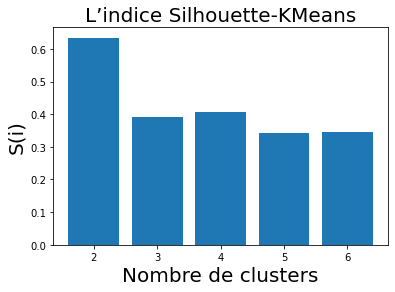

In [23]:
# un bar graph comparé les résultats S(i) KMeans
plt.title("L’indice Silhouette-KMeans", fontsize=20)
plt.bar(k, silhouette_scoresKM)
plt.xlabel('Nombre de clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()

In [24]:
silhouette_scoresKM[0]
#La meilleure partition est 2 clusters avec max S(i)>0,63 
#2 clusters donne la distance entre classes la plus distinguée.

0.6341345030494505

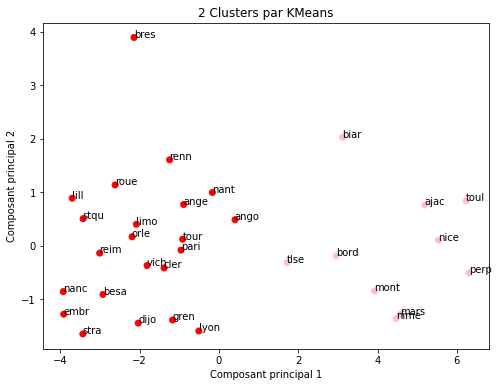

In [25]:
plt.figure(figsize =(8, 6))
plt.title('2 Clusters par KMeans')
plt.xlabel('Composant principal 1')
plt.ylabel('Composant principal 2')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c= clustering2, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
 plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

# Exercice 4 Silhouette index - AgglomerativeClustering

In [26]:
# AgglomerativeClustering linkage ward
#k=2
ac2 = AgglomerativeClustering(n_clusters = 2,affinity='euclidean', linkage='ward')
#k=3
ac3 = AgglomerativeClustering(n_clusters = 3,affinity='euclidean', linkage='ward')
#k=4
ac4 = AgglomerativeClustering(n_clusters = 4,affinity='euclidean', linkage='ward')
#k=5
ac5 = AgglomerativeClustering(n_clusters = 5,affinity='euclidean', linkage='ward')
#k=6
ac6 = AgglomerativeClustering(n_clusters = 6,affinity='euclidean', linkage='ward')

In [27]:
silhouette_scoresAgW = []
silhouette_scoresAgW.append(
        silhouette_score(X_pca, ac2.fit_predict(X_pca)))
silhouette_scoresAgW.append(
        silhouette_score(X_pca, ac3.fit_predict(X_pca)))
silhouette_scoresAgW.append(
        silhouette_score(X_pca, ac4.fit_predict(X_pca)))
silhouette_scoresAgW.append(
        silhouette_score(X_pca, ac5.fit_predict(X_pca)))
silhouette_scoresAgW.append(
        silhouette_score(X_pca, ac6.fit_predict(X_pca)))

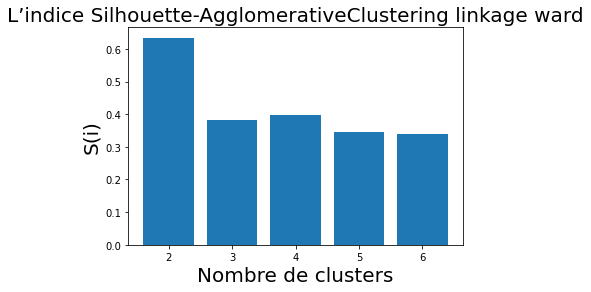

In [28]:
# un bar graph comparé les résultats S(i) AgglomerativeClustering linkage ward
plt.title("L’indice Silhouette-AgglomerativeClustering linkage ward", fontsize=20)
plt.bar(k, silhouette_scoresAgW)
plt.xlabel('Nombre de clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()

In [29]:
silhouette_scoresAgW[0]
#La meilleure partition est 2 clusters avec max S(i)>0,63 
#2 clusters donne la distance entre clusters la plus distinguée.

0.6341345030494505

In [30]:
# AgglomerativeClustering linkage average
#k=2
ac2 = AgglomerativeClustering(n_clusters = 2,affinity='euclidean', linkage='average')
#k=3
ac3 = AgglomerativeClustering(n_clusters = 3,affinity='euclidean', linkage='average')
#k=4
ac4 = AgglomerativeClustering(n_clusters = 4,affinity='euclidean', linkage='average')
#k=5
ac5 = AgglomerativeClustering(n_clusters = 5,affinity='euclidean', linkage='average')
#k=6
ac6 = AgglomerativeClustering(n_clusters = 6,affinity='euclidean', linkage='average')

In [31]:
silhouette_scoresAgA = []
silhouette_scoresAgA.append(
        silhouette_score(X_pca, ac2.fit_predict(X_pca)))
silhouette_scoresAgA.append(
        silhouette_score(X_pca, ac3.fit_predict(X_pca)))
silhouette_scoresAgA.append(
        silhouette_score(X_pca, ac4.fit_predict(X_pca)))
silhouette_scoresAgA.append(
        silhouette_score(X_pca, ac5.fit_predict(X_pca)))
silhouette_scoresAgA.append(
        silhouette_score(X_pca, ac6.fit_predict(X_pca)))

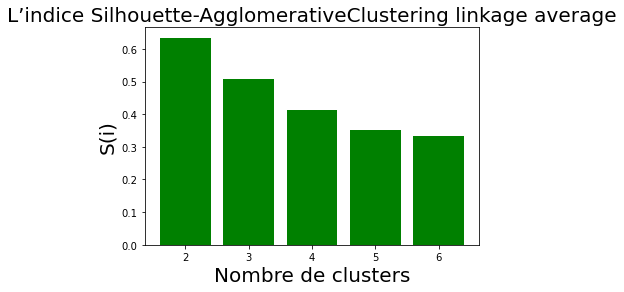

In [32]:
# un bar graph comparé les résultats S(i) AgglomerativeClustering linkage average
plt.title("L’indice Silhouette-AgglomerativeClustering linkage average", fontsize=20)
plt.bar(k, silhouette_scoresAgA,color='g')
plt.xlabel('Nombre de clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()

In [33]:
silhouette_scoresAgA[0]
#La meilleure partition est 2 clusters avec max S(i)>0,63 
#2 clusters donne la distance entre clusters la plus distinguée.

0.6341345030494505

In [34]:
# AgglomerativeClustering linkage single
#k=2
ac2 = AgglomerativeClustering(n_clusters = 2,affinity='euclidean', linkage='single')
#k=3
ac3 = AgglomerativeClustering(n_clusters = 3,affinity='euclidean', linkage='single')
#k=4
ac4 = AgglomerativeClustering(n_clusters = 4,affinity='euclidean', linkage='single')
#k=5
ac5 = AgglomerativeClustering(n_clusters = 5,affinity='euclidean', linkage='single')
#k=6
ac6 = AgglomerativeClustering(n_clusters = 6,affinity='euclidean', linkage='single')

In [35]:
silhouette_scoresAgS = []
silhouette_scoresAgS.append(
        silhouette_score(X_pca, ac2.fit_predict(X_pca)))
silhouette_scoresAgS.append(
        silhouette_score(X_pca, ac3.fit_predict(X_pca)))
silhouette_scoresAgS.append(
        silhouette_score(X_pca, ac4.fit_predict(X_pca)))
silhouette_scoresAgS.append(
        silhouette_score(X_pca, ac5.fit_predict(X_pca)))
silhouette_scoresAgS.append(
        silhouette_score(X_pca, ac6.fit_predict(X_pca)))

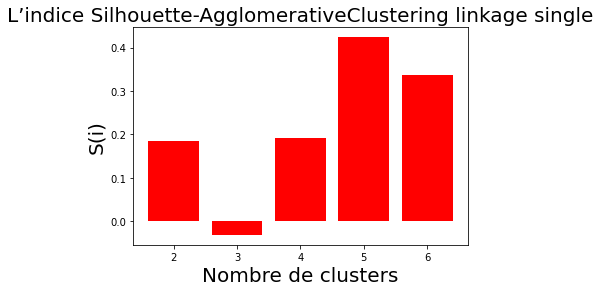

In [36]:
# un bar graph comparé les résultats S(i) AgglomerativeClustering linkage single
plt.title("L’indice Silhouette-AgglomerativeClustering linkage single", fontsize=20)
plt.bar(k, silhouette_scoresAgS,color='red')
plt.xlabel('Nombre de clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()

In [37]:
silhouette_scoresAgS[3]
#La meilleure partition est 5 clusters avec max S(i)~=0,42 
#clustering en 5 donne la distance entre les clusters la plus distinguée. 
#1: Signifie que les grappes sont bien séparées les unes des autres et clairement distinguées.
#0: Signifie que les clusters sont indifférents, la distance entre les clusters n’est pas significative.
#-1: Signifie que les clusters sont attribués de la mauvaise manière.

0.42394951020270644

# Exercic 5

In [38]:
#En considérant 3 clusters, quelle méthode donnera la meilleure partition ?
compare_sil = [['KMeans',silhouette_scoresKM[1]],['AgglomerativeClustering-Ward',silhouette_scoresAgW[1]],
               ['AgglomerativeClustering-Average',silhouette_scoresAgA[1]],
               ['AgglomerativeClustering-Single',silhouette_scoresAgS[1]]]
col_compare_sil =['Méthode','S(i)']
df = pd.DataFrame(compare_sil,columns=col_compare_sil)
df

,Méthode,S(i)
0,KMeans,0.391030
1,AgglomerativeClustering-Ward,0.381537
2,AgglomerativeClustering-Average,0.506755
3,AgglomerativeClustering-Single,-0.031653


In [39]:
print(df[df['S(i)'] == df['S(i)'].max()])
#AgglomerativeClustering avec le critère d’agrégation average S(i) ~=0,51

                           Méthode      S(i)
2  AgglomerativeClustering-Average  0.506755


# Exercic 6 

In [40]:
#Citer les avantages et les inconvénients des méthodes de classification hiérarchiques 
#(AgglomerativeClustering) et celles de partitionnement (KMeans).
#L'algorithme du KMeans converge en général très rapidement : il n'est pas rare qu'il atteigne 
#la convergence au bout de 10 itérations,même avec beaucoup de points.
#Malheureusement, le KMeans n'est pas capable de déterminer le nombre de classes optimal 
#car on est obligé de le lui spécifier au départ.Si on lui demande de trouver 3 clusters 
#alors que les données sont très clairement regroupées en 5 clusters,par conséquent, le KMeans nous donnera 3 clusters, 
#même si ce n'est visiblement pas la solution la meilleure.

In [41]:
#Contrairement au Kmeans, la classification hiérarchique ne nécessite pas de déterminer un nombre de classes au préalable.
#En effet, en jouant sur la profondeur de l'arbre, on peut explorer différentes possibilités et choisir le nombre de classes 
#qui nous convient le mieux.
#Ce choix peut se faire en regardant les inerties intraclasse et interclasse, ou en utilisant d'autres critères. 
#Nous pouvons choisir un nombre de classes en observant le dendrogramme.

#Cependant, il y a des chances pour que l'algorithme de classification hiérarchique mette du temps avant de nous fournir son résultat. 
#En effet, à chaque itération (c'est-à-dire à chaque fois que l'on divise un cluster en 2 pour l'approche descendante,
#ou que l'on regroupe 2 clusters pour l'approche ascendante), il faut recalculer les distances de toutes les paires de points possibles 
#entre les 2 clusters en question !

#Cela nécessite beaucoup de temps et beaucoup d'espace mémoire. On dit que cet algorithme a une forte complexité algorithmique
#en temps et en espace, c'est-à-dire que nous manquons peut-être de temps ou d'espace mémoire, 
#même avec un jeu de données de taille moyenne. Le clustering hiérarchique est donc plus adapté aux petits échantillons.

# Exercic 7 

In [63]:
#Une approche mixte ou hybride : utiliser KMeans (linkage ward) pour clustering en 10 classes car le Kmeans est adaptable
#pour tous les tailles de données mais on doit spécifier un nombre de classes au départ( 10 est assez bon). 
#Ensuite, regrouper encore ces 10 classes par la méthode AgglomerativeClustering.Le dendogram va donner la classification 
#hiérarchique  et on peut choisir un number de classes qui correspandant aux besoins, ici on va choisir 3 classes.
#Puis,calculer les centre-poids (centroids) des classes générés par la méthode AgglomerativeClustering et initialiser 
#le KMeans encore une fois pour regrouper les données en nombre de classes précédents par les centre-poids provenant de 
#la méthode AgglomerativeClustering. Le silhouette_score du KMeans (linkage ward) modifié est meilleur que celui sans modification.


In [43]:
kmeans10 = KMeans(n_clusters=10, init = 'k-means++', max_iter = 150, random_state = 5).fit(X_pca)
clustering10 = kmeans10.labels_    
centerpoids = kmeans10.cluster_centers_

In [44]:
clustering10

array([5, 2, 2, 0, 7, 4, 6, 3, 8, 0, 8, 9, 3, 8, 1, 1, 0, 2, 5, 1, 3, 3,
       5, 9, 2, 9, 9, 0, 5, 4, 2, 3])

In [45]:
centerpoids

array([[-3.54793426, -1.17755846],
       [ 4.32139609, -1.16656151],
       [-0.56124613,  0.79470358],
       [-1.68430964, -0.0619276 ],
       [ 2.33531815, -0.25455498],
       [ 5.81596902,  0.29659735],
       [-2.14172992,  3.89449982],
       [ 3.11703576,  2.02750003],
       [-1.23585736, -1.47990213],
       [-3.18672962,  0.59661639]])

In [46]:
centerpoids[:,0]

array([-3.54793426,  4.32139609, -0.56124613, -1.68430964,  2.33531815,
        5.81596902, -2.14172992,  3.11703576, -1.23585736, -3.18672962])

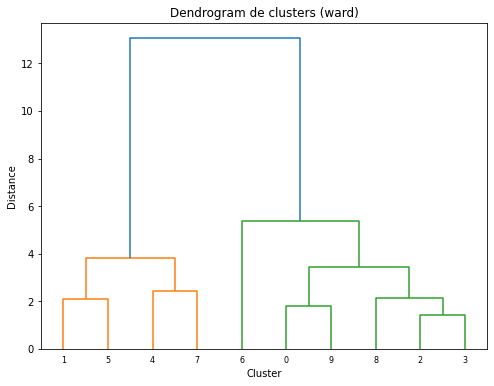

In [47]:
plt.figure(figsize =(8, 6))
plt.title('Dendrogram de clusters (ward)')
plt.xlabel('Cluster')
plt.ylabel('Distance')
Z = linkage(centerpoids,'ward')
dendrogram(Z, leaf_font_size=8)
plt.show()

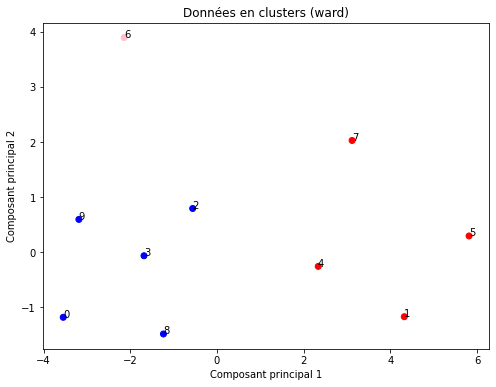

In [48]:
clusterKM = [0,1,2,3,4,5,6,7,8,9]
ac3 = AgglomerativeClustering(n_clusters = 3,affinity='euclidean', linkage='ward')
plt.figure(figsize =(8, 6))
plt.title('Données en clusters (ward)')
plt.xlabel('Composant principal 1')
plt.ylabel('Composant principal 2')
plt.scatter(centerpoids[:, 0], centerpoids[:, 1],  
           c = ac3.fit_predict(centerpoids), cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(clusterKM,centerpoids[:, 0], centerpoids[:, 1]):
 plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

In [49]:
y_predict = ac3.fit_predict(centerpoids)
y_predict

array([1, 0, 1, 1, 0, 0, 2, 0, 1, 1], dtype=int64)

In [50]:
clf = NearestCentroid()
clf.fit(centerpoids,y_predict)
print(clf.centroids_)
#c'est les centroids de 3 classes par AgglomerativeClustering

[[ 3.89742975  0.22574522]
 [-2.0432154  -0.26561364]
 [-2.14172992  3.89449982]]


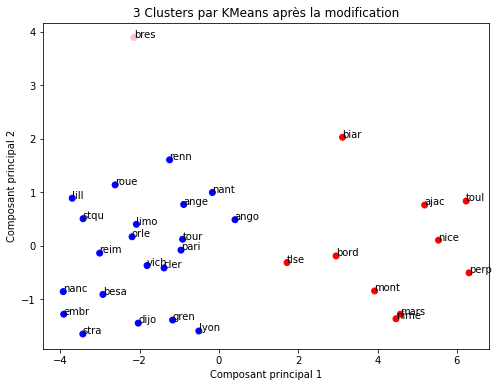

L’indice Silhouette de 3 clusters-KMeans modifié =0.5067547529956744


In [51]:
kmeans3Modif = KMeans(n_clusters=3, init = clf.centroids_, max_iter = 150)
kmeans3Modif.fit_predict(X_pca)
clustering3 = kmeans3Modif.labels_    
plt.figure(figsize =(8, 6))
plt.title('3 Clusters par KMeans après la modification')
plt.xlabel('Composant principal 1')
plt.ylabel('Composant principal 2')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c= clustering3, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
 plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()
s_score = silhouette_score(X_pca,clustering3,metric='euclidean')
print("L’indice Silhouette de 3 clusters-KMeans modifié ="+str(s_score))

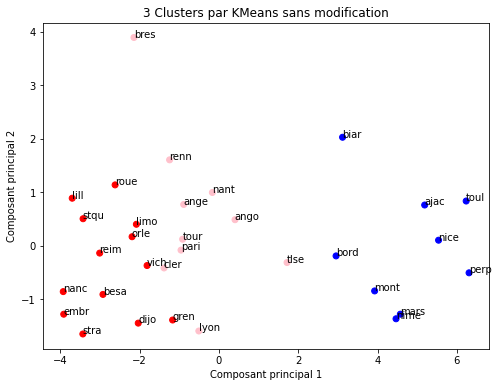

L’indice Silhouette de 3 clusters-KMeans sans modification =0.3910302889529388


In [52]:
#Comparer avec KMeans sans modification
kmeans3 = KMeans(n_clusters=3, init = 'k-means++', max_iter = 150, random_state = 5)
kmeans3.fit_predict(X_pca)
clustering3 = kmeans3.labels_    
plt.figure(figsize =(8, 6))
plt.title('3 Clusters par KMeans sans modification')
plt.xlabel('Composant principal 1')
plt.ylabel('Composant principal 2')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c= clustering3, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
 plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()
s_score = silhouette_score(X_pca,clustering3,metric='euclidean')
print("L’indice Silhouette de 3 clusters-KMeans sans modification ="+str(s_score))
    

In [53]:
#paramètres data:données, labels:nom ou numbre de lignes, show_label:boolean pour afficher labels ou non
def clustering_mixte(data,labels,show_labels):
    kmeans10 = KMeans(n_clusters=10, init = 'k-means++', max_iter = 150, random_state = 5).fit(data)
    clustering10 = kmeans10.labels_    
    centerpoids = kmeans10.cluster_centers_
    #plot dendogram par le centerpoids
    plt.figure(figsize =(8, 6))
    plt.title('Dendrogram de clusters (ward)')
    plt.xlabel('Cluster')
    plt.ylabel('Distance')
    Z = linkage(centerpoids,'ward')
    dendrogram(Z, leaf_font_size=8)
    plt.show()
    #calculer centroid des clusters par la méthode AgglomerativeClustering
    ac3 = AgglomerativeClustering(n_clusters = 3,affinity='euclidean', linkage='ward')
    y_predict = ac3.fit_predict(centerpoids)
    clf = NearestCentroid()
    clf.fit(centerpoids,y_predict)
    #plot 3 clusters par K-Means avec la modification
    colors = ['red','yellow','blue','pink']
    kmeans3Modif = KMeans(n_clusters=3, init = clf.centroids_, max_iter = 150).fit(data)
    clustering3 = kmeans3Modif.labels_    
    plt.figure(figsize =(15, 8))
    plt.title('3 Clusters par KMeans après la modification')
    plt.xlabel('Composant principal 1')
    plt.ylabel('Composant principal 2')
    plt.scatter(data[:, 0], data[:, 1], c= clustering3, cmap=matplotlib.colors.ListedColormap(colors))
    if(show_labels):
        for label, x, y in zip(labels, data[:, 0], data[:, 1]):
            plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
    plt.show()
    #calculer l’indice Silhouette
    s_score = silhouette_score(data,clustering3,metric='euclidean')
    print("L’indice Silhouette de 3 clusters-KMeans modifié ="+str(s_score))
    

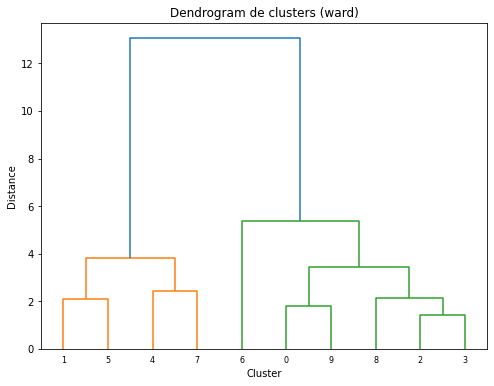

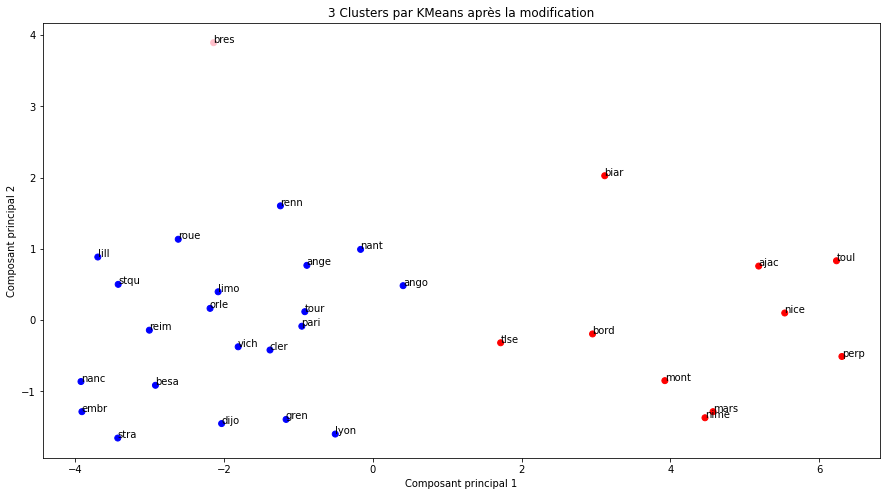

L’indice Silhouette de 3 clusters-KMeans modifié =0.5067547529956744


In [54]:
clustering_mixte(X_pca,labels,show_labels=True)

# Exercice 8 

In [55]:
#wdbc.csv
data2 = pd.read_csv('wdbc.csv', sep=";", header=None, prefix='Column_')
data2.head()

,Column_0,Column_1,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,...,Column_20,Column_21,Column_22,Column_23,Column_24,Column_25,Column_26,Column_27,Column_28,Column_29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [56]:
data2.index

RangeIndex(start=0, stop=569, step=1)

In [57]:
# Standardizing the data
X2 = StandardScaler().fit_transform(data2)
pca2 = PCA(n_components=2)
X_wdbc = pca2.fit_transform(X2)
pca2.explained_variance_ratio_*100

array([44.27202561, 18.97118204])

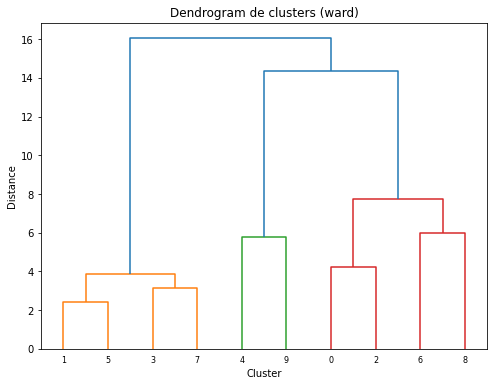

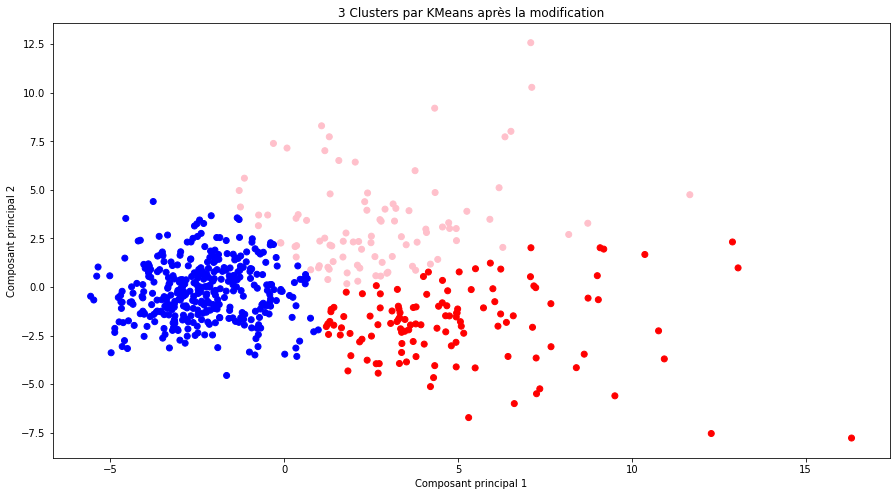

L’indice Silhouette de 3 clusters-KMeans modifié =0.49100717654367887
Wall time: 784 ms


In [58]:
%%time
clustering_mixte(X_wdbc,data2.index.values,show_labels=False)

In [59]:
#spamb.csv
data3 = pd.read_csv('spamb.csv', sep=";", header=None, prefix='Column_')
data3.head()

,Column_0,Column_1,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,...,Column_47,Column_48,Column_49,Column_50,Column_51,Column_52,Column_53,Column_54,Column_55,Column_56
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


In [60]:
data3.index

RangeIndex(start=0, stop=4601, step=1)

In [69]:
X3 = StandardScaler().fit_transform(data3)
pca3 = PCA(n_components=2)
X_spamb = pca3.fit_transform(X3)
print(X3.shape)
pca3.explained_variance_ratio_*100

(4601, 57)


array([11.56479381,  5.73232226])

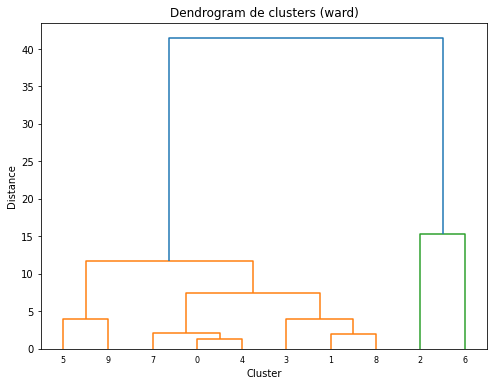

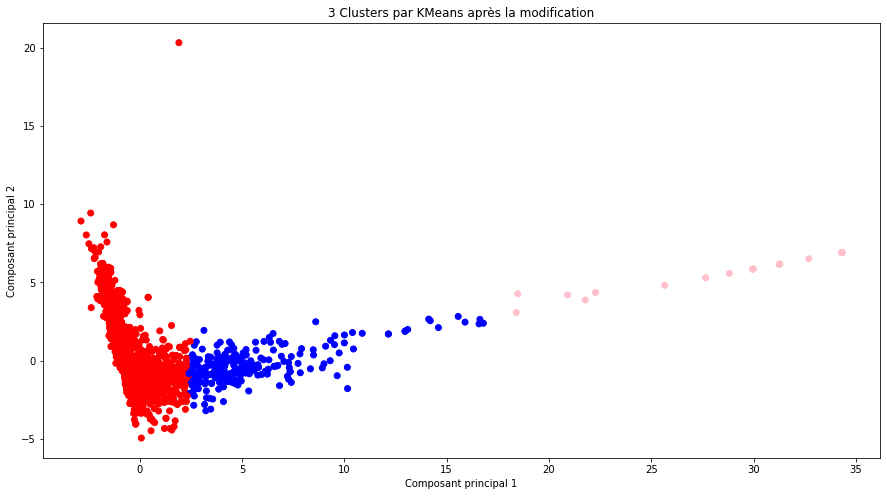

L’indice Silhouette de 3 clusters-KMeans modifié =0.6313176975506112
Wall time: 1.74 s


In [71]:
%%time
clustering_mixte(X_spamb,data3.index.values,show_labels=False)